In [17]:
from textstat.textstat import textstat
import csv
import pandas
import matplotlib
#matplotlib.style.use('ggplot')
%matplotlib inline

In [55]:
trump_df = pandas.read_csv('data/all_trump.csv')
clinton_df = pandas.read_csv('data/all_clinton.csv')
sanders_df = pandas.read_csv('data/all_sanders.csv')
cruz_df = pandas.read_csv('data/all_cruz.csv')
ORGS = ['nyt', 'wsj', 'cnn', 'fox', 'ap', 'reuters', 'politico', 'mcclatchy', 'buzzfeed', 'huffpo','latimes']


In [56]:
n = len(clinton_df)
clinton_df.index = xrange(len(trump_df), (len(trump_df) + n))
m = len(sanders_df)
sanders_df.index = xrange(max(clinton_df.index), max(clinton_df.index) + m)
c = len(cruz_df)
cruz_df.index = xrange(max(sanders_df.index), max(sanders_df.index) + c)

In [ ]:
all_df = pandas.concat([trump_df,clinton_df, sanders_df, cruz_df]) 
all_df['gunning_fog'] = all_df['body'].apply(lambda x: textstat.gunning_fog(x) if type(x) == str else None)
all_df['flesch'] = all_df['body'].apply(lambda x: textstat.flesch_kincaid_grade(x) if type(x) == str else None)
all_df['readability'] = all_df['body'].apply(lambda x: textstat.flesch_reading_ease(x) if type(x) == str else None)

In [64]:
print "total num stories:", len(all_df)
for o in ORGS:
    print "total num stories from", o, ":", len(all_df[all_df['org'] == o])

total num stories: 6130
total num stories from nyt : 634
total num stories from wsj : 373
total num stories from cnn : 721
total num stories from fox : 648
total num stories from ap : 601
total num stories from reuters : 297
total num stories from politico : 1404
total num stories from mcclatchy : 178
total num stories from buzzfeed : 88
total num stories from huffpo : 836
total num stories from latimes : 243


In [65]:
 for o in orgs:
    all_df['flesch_' + o] = all_df[all_df['org'] == o]['body'].apply(lambda x: textstat.flesch_kincaid_grade(x) if type(x) == str else None)
    print "Average Flesch-Kincaid grade for " + o + " stories:", all_df['flesch_' + o].mean()
    # Average Flesch-Kincaid grade for AP stories: 9.97941176471
    

Average Flesch-Kincaid grade for nyt stories: 7.52767295597
Average Flesch-Kincaid grade for wsj stories: 7.90375335121
Average Flesch-Kincaid grade for cnn stories: 9.63106796117
Average Flesch-Kincaid grade for fox stories: 9.2549382716
Average Flesch-Kincaid grade for ap stories: 9.62196339434
Average Flesch-Kincaid grade for reuters stories: 10.165993266
Average Flesch-Kincaid grade for politico stories: 8.68668091168
Average Flesch-Kincaid grade for mcclatchy stories: 8.63595505618
Average Flesch-Kincaid grade for buzzfeed stories: 12.3454545455
Average Flesch-Kincaid grade for huffpo stories: 9.82858851675
Average Flesch-Kincaid grade for latimes stories: 9.90614754098


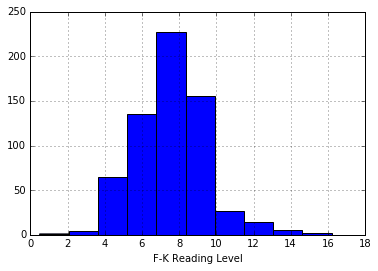

In [67]:
o = 'nyt'
all_df['flesch_'+ o].hist().set_xlabel("F-K Reading Level") 
all_df[all_df['flesch_']]